TypeError: xticks(): Parameter 'labels' can't be set without setting 'ticks'

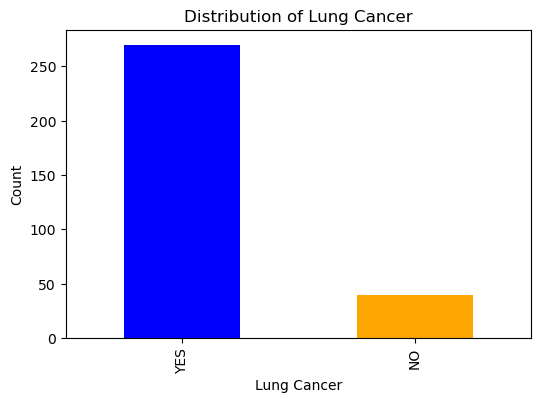

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("survey_lung_cancer.csv")

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
df['LUNG_CANCER'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Lung Cancer')
plt.xlabel('Lung Cancer')
plt.ylabel('Count')
plt.xticks(rotation=0, labels=['No', 'Yes'])
plt.show()


In [26]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the CSV dataset
df = pd.read_csv(r"survey_lung_cancer.csv")

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['GENDER'])

# Separate features (X) and target (y)
X = df_encoded.drop('LUNG_CANCER', axis=1)
y = df_encoded['LUNG_CANCER']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train-validation-test sets (70-15-15)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize Random Forest classifier
random_forest_model = RandomForestClassifier()

# Train the model on resampled data
random_forest_model.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set
y_pred_rf = random_forest_model.predict(X_val)
y_pred_test = random_forest_model.predict(X_test)

# Calculate accuracy and print classification report
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print("\nRandom Forest Validation Accuracy (with SMOTE):", accuracy_rf)
print("Random Forest Validation Classification Report (with SMOTE):")
print(classification_report(y_val, y_pred_rf))
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nRandom Forest Test Accuracy (with SMOTE):", accuracy_test)

# Optional: Print feature importances
if isinstance(random_forest_model, RandomForestClassifier):
    feature_importances = random_forest_model.feature_importances_
    # Print feature importances (if needed)



Random Forest Validation Accuracy (with SMOTE): 0.9782608695652174
Random Forest Validation Classification Report (with SMOTE):
              precision    recall  f1-score   support

          NO       0.80      1.00      0.89         4
         YES       1.00      0.98      0.99        42

    accuracy                           0.98        46
   macro avg       0.90      0.99      0.94        46
weighted avg       0.98      0.98      0.98        46


Random Forest Test Accuracy (with SMOTE): 0.9787234042553191


D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

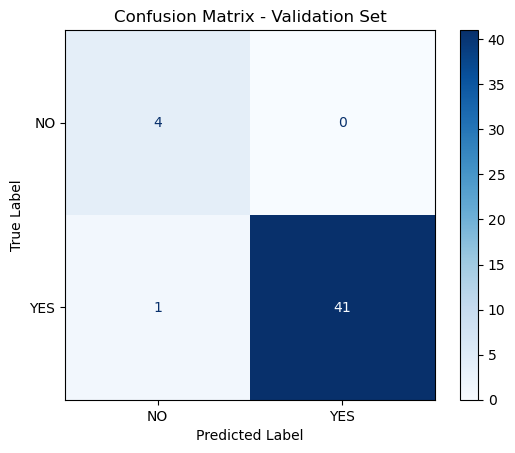

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 800x600 with 0 Axes>

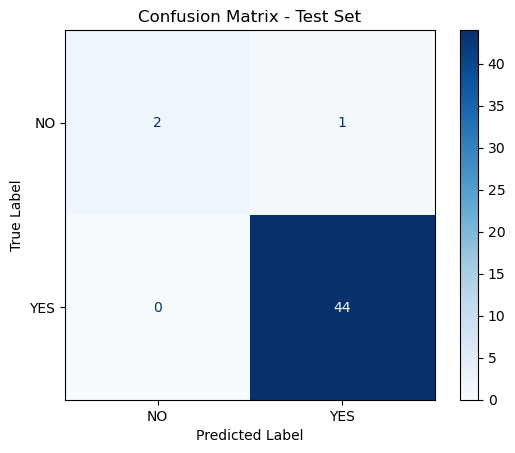

In [3]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
plot_confusion_matrix(random_forest_model, X_val, y_val, display_labels=["NO", "YES"], cmap=plt.cm.Blues, normalize=None)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
plot_confusion_matrix(random_forest_model, X_test, y_test, display_labels=["NO", "YES"], cmap=plt.cm.Blues, normalize=None)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


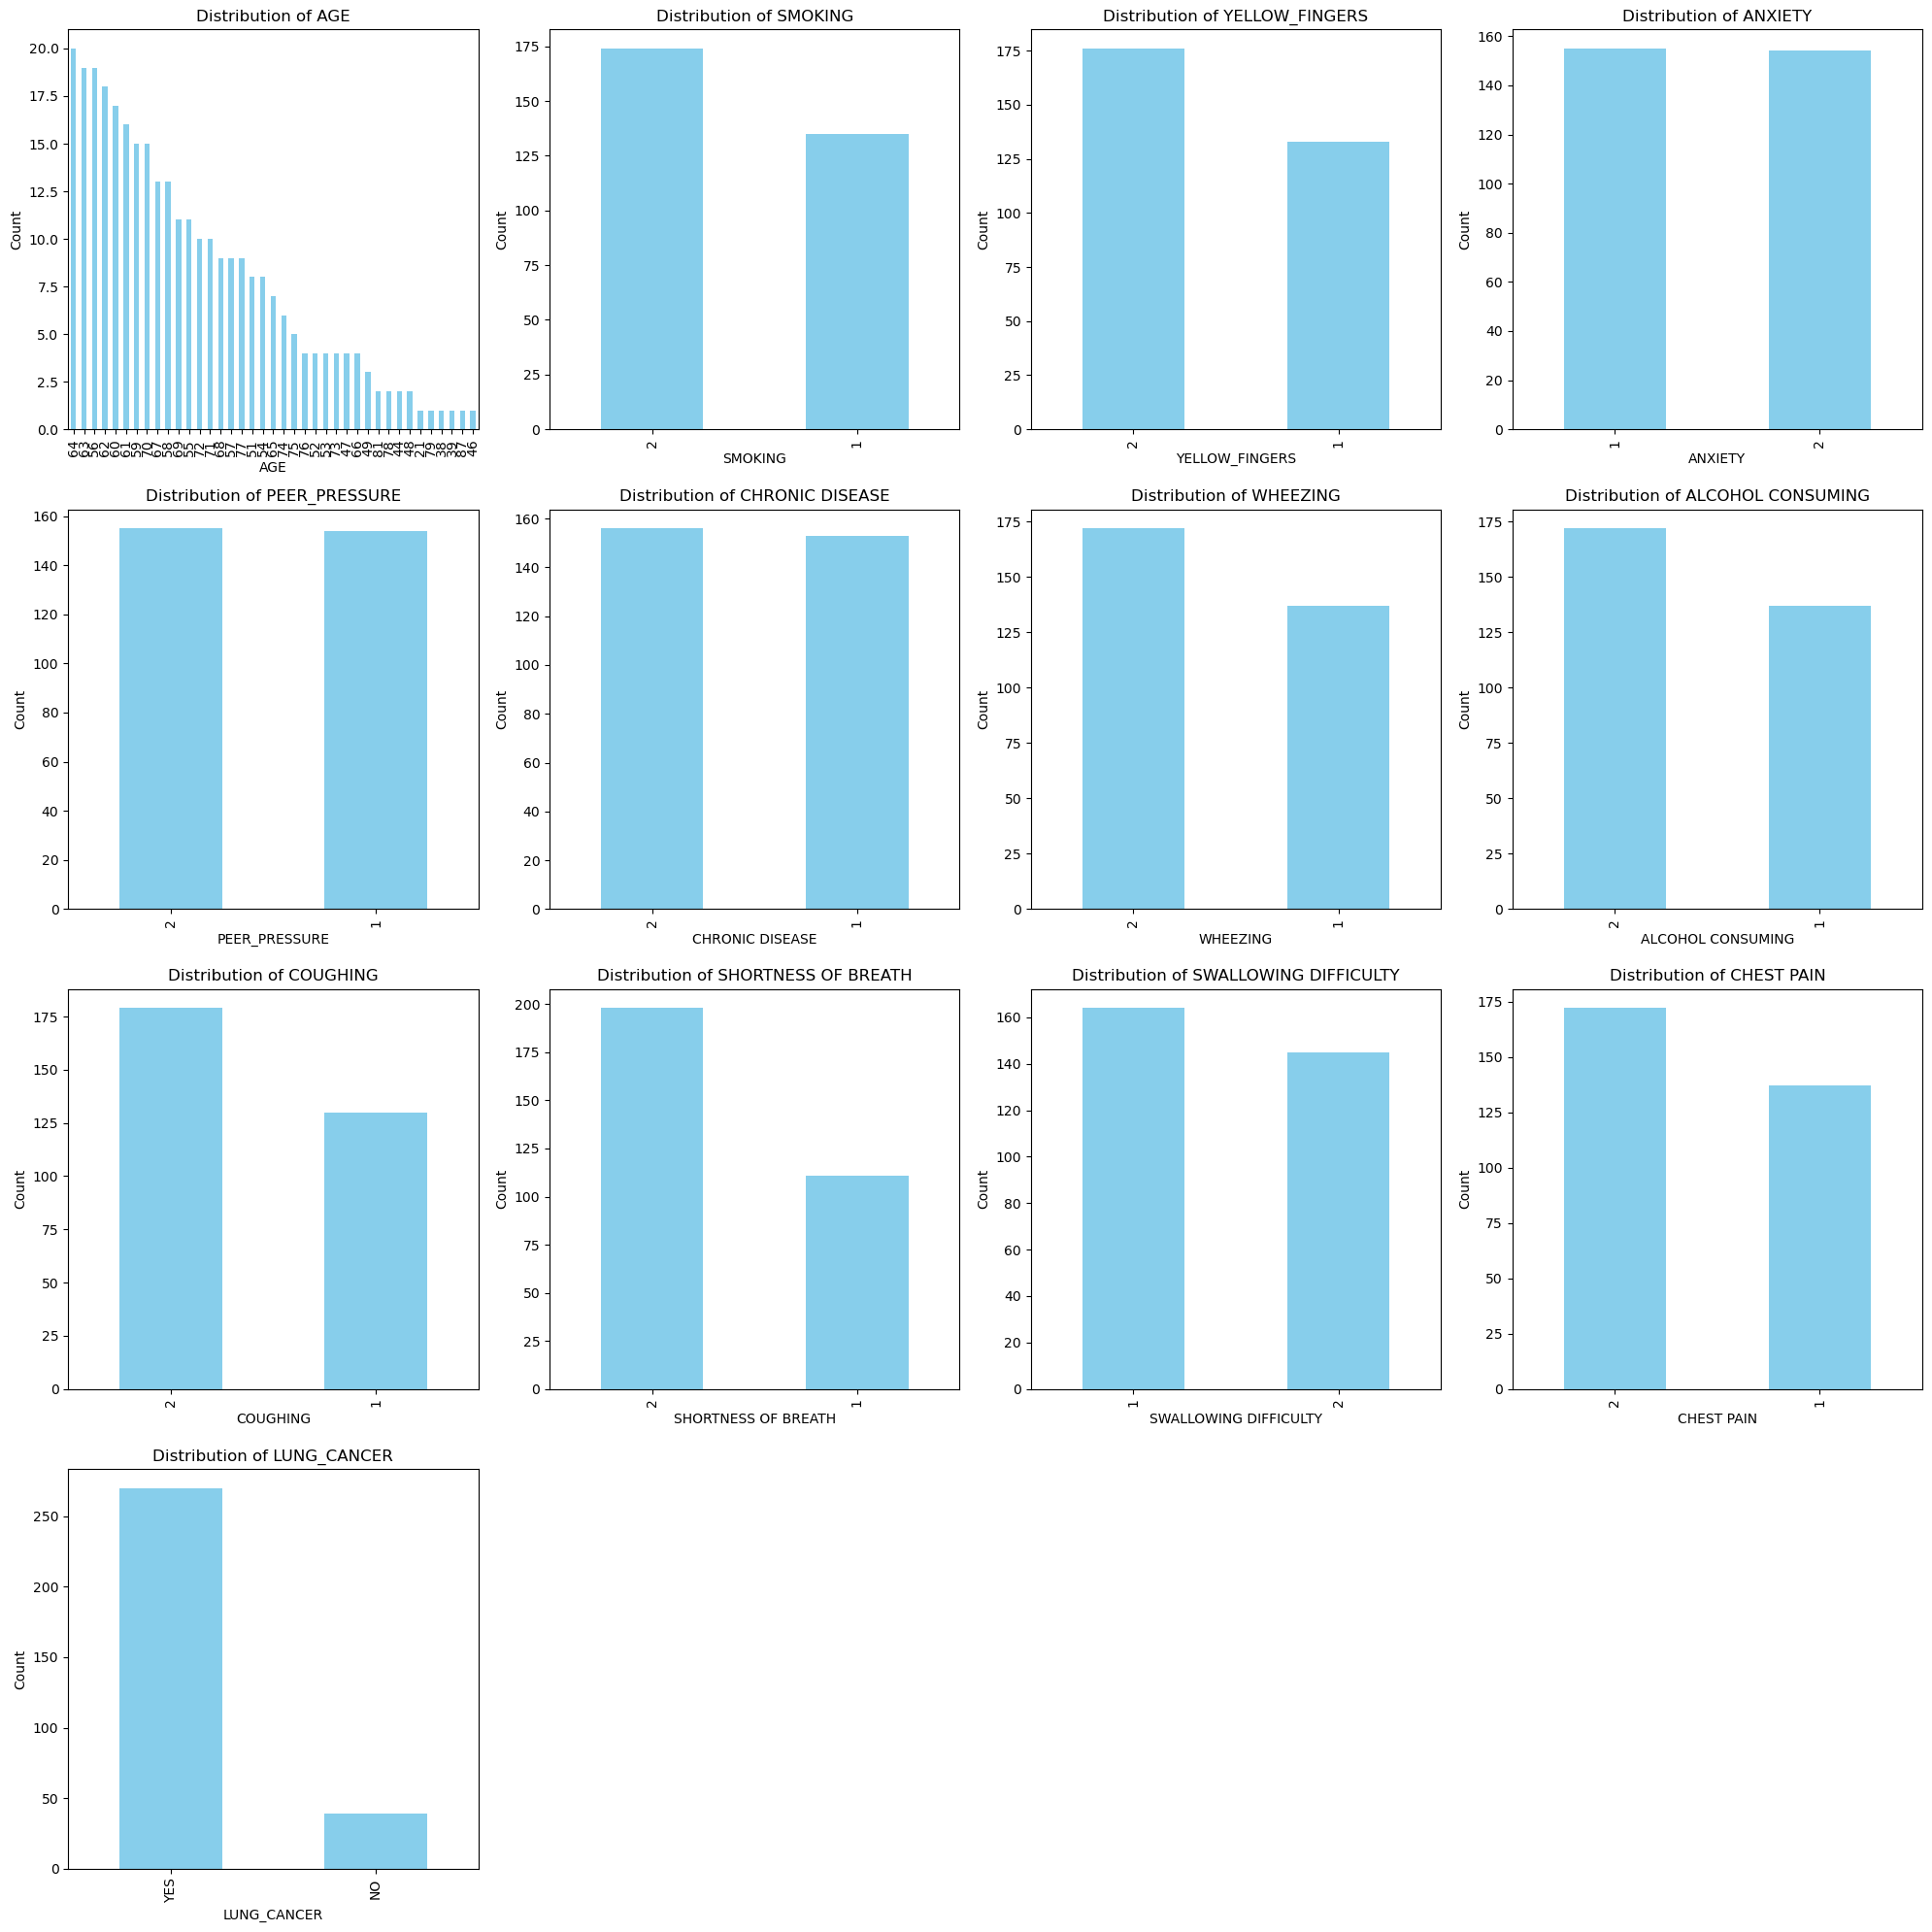

In [28]:
import matplotlib.pyplot as plt

# Define the main features
main_features = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
                 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 
                 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

# Filter out features that are not in the encoded DataFrame
existing_features = [feature for feature in main_features if feature in df_encoded.columns]

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot the distribution of main features
for i, feature in enumerate(existing_features):
    df_encoded[feature].value_counts().plot(kind='bar', color='skyblue', ax=axes[i])
    axes[i].set_title('Distribution of ' + feature)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Remove unused subplots
for i in range(len(existing_features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder

# Assuming df_encoded is your DataFrame
# Encode categorical columns
label_encoder = LabelEncoder()
df_encoded['GENDER'] = label_encoder.fit_transform(df_encoded['GENDER'])
df_encoded['LUNG_CANCER'] = label_encoder.fit_transform(df_encoded['LUNG_CANCER'])

# Define the main features (after encoding GENDER and LUNG_CANCER)
main_features = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
                 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 
                 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

# Filter out features that are not in the encoded DataFrame
existing_features = [feature for feature in main_features if feature in df_encoded.columns]

# Select only the existing features from the DataFrame
df_selected = df_encoded[existing_features]

# Create scatter plot matrix
scatter_matrix(df_selected, figsize=(20, 20), diagonal='hist', color='skyblue', alpha=0.7)

# Adjust layout
plt.suptitle('Scatter Plot Matrix of Main Features', size=20)
plt.tight_layout()
plt.show()


KeyError: 'GENDER'

The 'GENDER' column is not present in the encoded DataFrame.
The 'FATIGUE' column is not present in the encoded DataFrame.
The 'ALLERGY' column is not present in the encoded DataFrame.


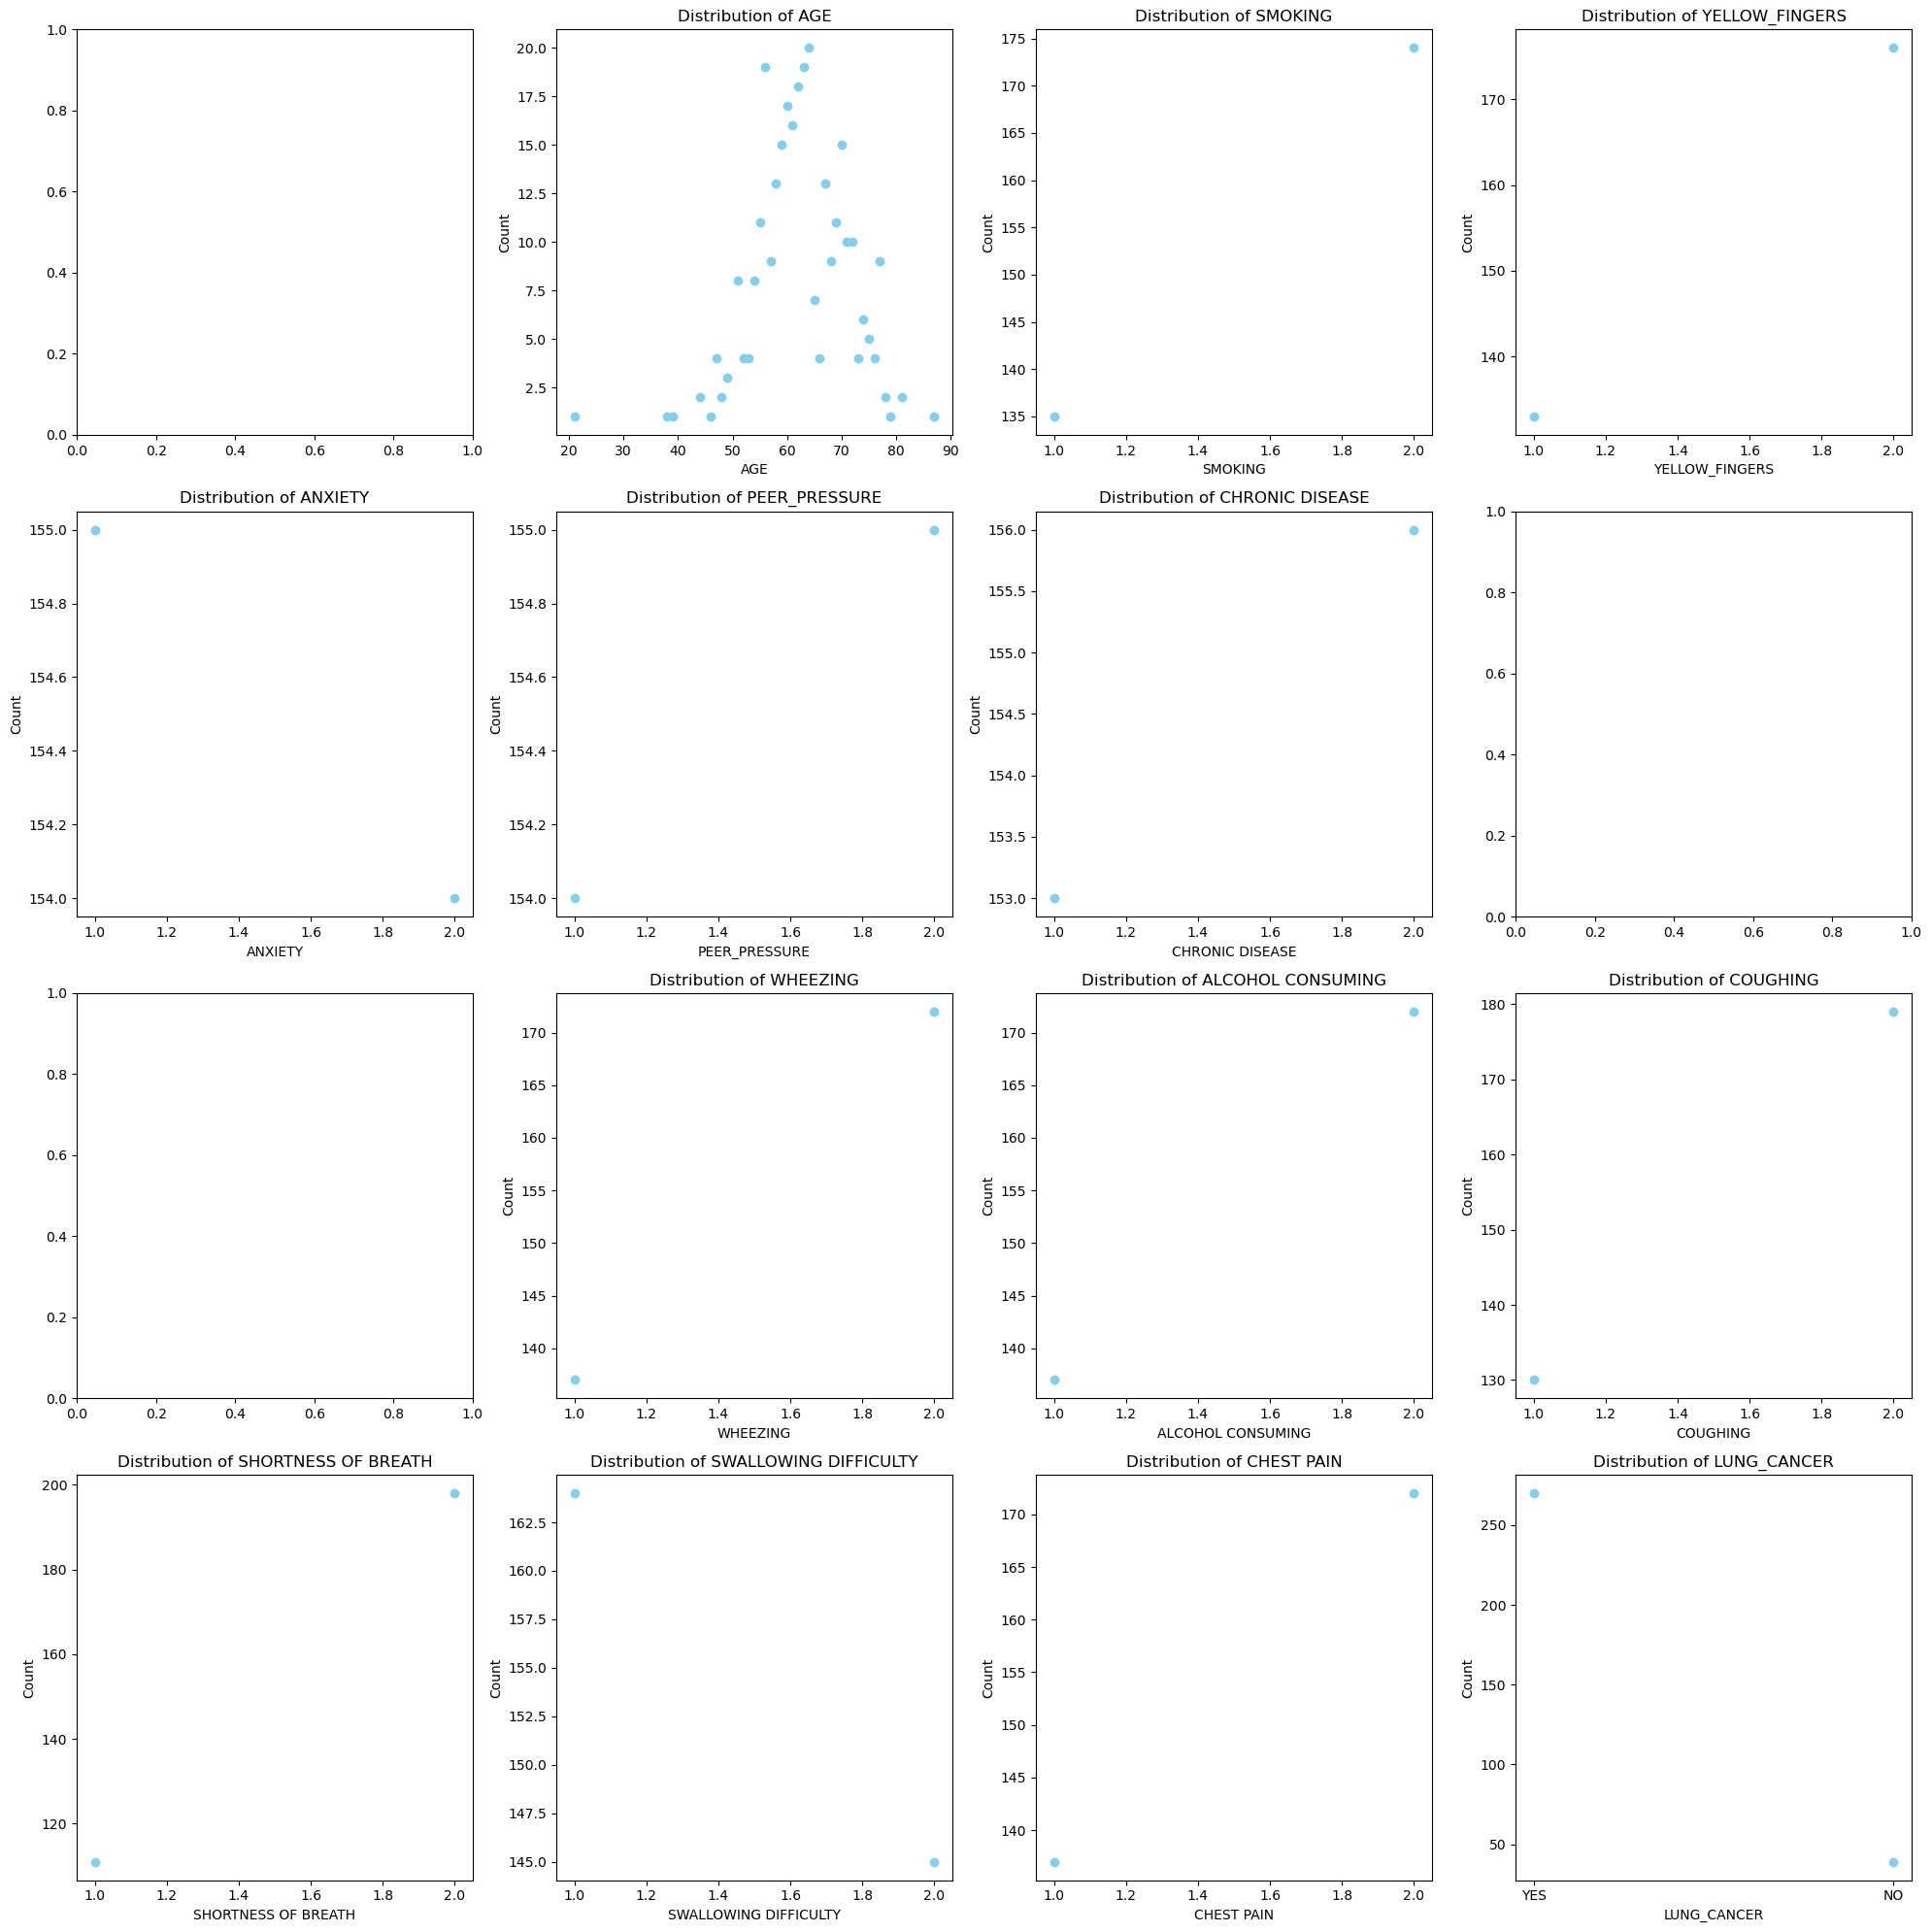

In [5]:
import matplotlib.pyplot as plt

# Define the main features
main_features = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
                 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 
                 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot the distribution of main features
for i, feature in enumerate(main_features):
    if feature in df_encoded.columns:
        value_counts = df_encoded[feature].value_counts()
        x = value_counts.index
        y = value_counts.values
        axes[i].scatter(x, y, color='skyblue')
        axes[i].set_title('Distribution of ' + feature)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
    else:
        print("The '" + feature + "' column is not present in the encoded DataFrame.")

# Remove unused subplots
for i in range(len(main_features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


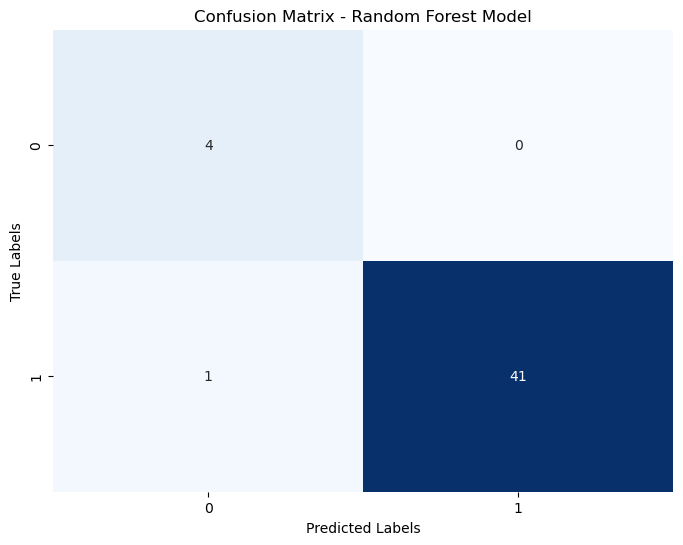

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - Random Forest Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


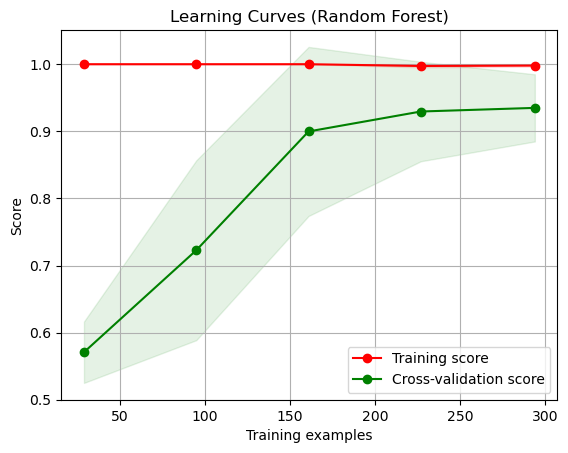

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Random Forest)"
plot_learning_curve(random_forest_model, title, X_train_resampled, y_train_resampled, cv=5, n_jobs=-1)
plt.show()


In [8]:
# Print precision and recall for each class (0 and 1)
report = classification_report(y_val, y_pred_rf, target_names=['Class 0', 'Class 1'])
print("Random Forest Validation Classification Report (with SMOTE):\n", report)


Random Forest Validation Classification Report (with SMOTE):
               precision    recall  f1-score   support

     Class 0       0.80      1.00      0.89         4
     Class 1       1.00      0.98      0.99        42

    accuracy                           0.98        46
   macro avg       0.90      0.99      0.94        46
weighted avg       0.98      0.98      0.98        46



In [9]:
# Get the number of decision trees in the Random Forest
num_decision_trees = random_forest_model.n_estimators

# Print the number of decision trees
print("Number of Decision Trees in Random Forest:", num_decision_trees)


Number of Decision Trees in Random Forest: 100


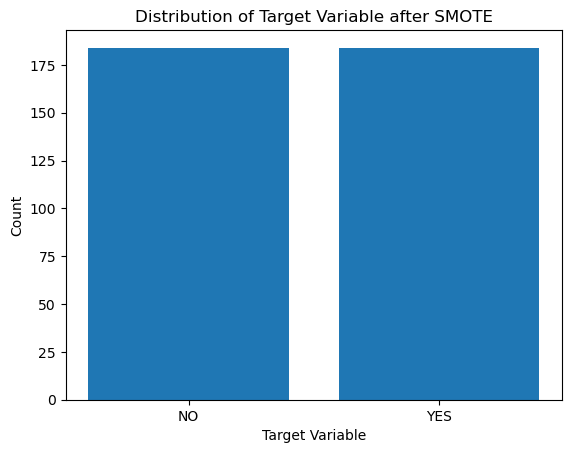

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Get the counts of each class in the target variable after SMOTE
unique, counts = np.unique(y_train_resampled, return_counts=True)

# Plot the bar graph
plt.bar(unique, counts)
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.title('Distribution of Target Variable after SMOTE')
plt.xticks(unique)  # Ensure all classes are shown on the x-axis
plt.show()


In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculate precision, recall, and F1 score for validation set
precision_rf = precision_score(y_val, y_pred_rf, pos_label='YES')
recall_rf = recall_score(y_val, y_pred_rf, pos_label='YES')
f1_rf = f1_score(y_val, y_pred_rf, pos_label='YES')

# Print precision, recall, and F1 score
print("\nRandom Forest Validation Precision:", precision_rf)
print("Random Forest Validation Recall:", recall_rf)
print("Random Forest Validation F1 Score:", f1_rf)

# Calculate ROC AUC score for validation set
roc_auc_rf = roc_auc_score(y_val, random_forest_model.predict_proba(X_val)[:, 1])

# Print ROC AUC score
print("Random Forest ROC AUC Score:", roc_auc_rf)



Random Forest Validation Precision: 1.0
Random Forest Validation Recall: 0.9761904761904762
Random Forest Validation F1 Score: 0.9879518072289156
Random Forest ROC AUC Score: 0.9940476190476191


In [12]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
k = 8  # Number of folds
scores = cross_val_score(random_forest_model, X_train_resampled, y_train_resampled, cv=k)

# Print the cross-validation scores
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean()}")
print(f"Standard Deviation of Accuracy: {scores.std()}")


Cross-Validation Scores: [0.76086957 0.86956522 0.95652174 1.         0.97826087 0.97826087
 0.95652174 0.95652174]
Mean Accuracy: 0.9320652173913044
Standard Deviation of Accuracy: 0.07407072375238592


Decision tree methodology


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score, roc_auc_score

# Load the CSV dataset
df = pd.read_csv("survey_lung_cancer.csv")

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['GENDER'])

# Separate features (X) and target (y)
X = df_encoded.drop('LUNG_CANCER', axis=1)
y = df_encoded['LUNG_CANCER']

# Encode target labels to numerical values
y = y.map({'YES': 1, 'NO': 0})

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train-validation-test sets (70-15-15)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize Decision Tree classifier
decision_tree_model = DecisionTreeClassifier()

# Train the model on resampled data
decision_tree_model.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set
y_pred_dt = decision_tree_model.predict(X_val)

# Calculate accuracy
accuracy_dt = accuracy_score(y_val, y_pred_dt)
print("\nDecision Tree Validation Accuracy (with SMOTE):", accuracy_dt)

# Calculate and print other metrics
print("Decision Tree Validation Metrics (with SMOTE):")
print(classification_report(y_val, y_pred_dt))



Decision Tree Validation Accuracy (with SMOTE): 0.9347826086956522
Decision Tree Validation Metrics (with SMOTE):
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.93      0.96        42

    accuracy                           0.93        46
   macro avg       0.79      0.96      0.85        46
weighted avg       0.96      0.93      0.94        46



Logistic regression

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the CSV dataset
df = pd.read_csv("survey_lung_cancer.csv")

# Encode categorical variables
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])

# Separate features (X) and target (y)
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train-validation-test sets (70-15-15)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize Logistic Regression classifier
logistic_regression_model = LogisticRegression()

# Train the model
logistic_regression_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_lr = logistic_regression_model.predict(X_val)
y_pred_test = logistic_regression_model.predict(X_test)

# Calculate accuracy and print classification report
accuracy_lr = accuracy_score(y_val, y_pred_lr)
print("\nLogistic Regression Validation Accuracy:", accuracy_lr)
print("Logistic Regression Validation Classification Report:")
print(classification_report(y_val, y_pred_lr))
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nLogistic Regression Test Accuracy:", accuracy_test)



Logistic Regression Validation Accuracy: 0.9782608695652174
Logistic Regression Validation Classification Report:
              precision    recall  f1-score   support

          NO       1.00      0.75      0.86         4
         YES       0.98      1.00      0.99        42

    accuracy                           0.98        46
   macro avg       0.99      0.88      0.92        46
weighted avg       0.98      0.98      0.98        46


Logistic Regression Test Accuracy: 0.9787234042553191


In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculate precision, recall, and F1 score for validation set
precision_val = precision_score(y_val, y_pred_lr, pos_label='YES')
recall_val = recall_score(y_val, y_pred_lr, pos_label='YES')
f1_val = f1_score(y_val, y_pred_lr, pos_label='YES')

# Calculate ROC AUC score for validation set
y_proba_val = logistic_regression_model.predict_proba(X_val)[:, 1]
roc_auc_val = roc_auc_score(y_val, y_proba_val)

# Print the scores
print("\nLogistic Regression Validation Precision:", precision_val)
print("Logistic Regression Validation Recall:", recall_val)
print("Logistic Regression Validation F1 Score:", f1_val)
print("Logistic Regression Validation ROC AUC Score:", roc_auc_val)



Logistic Regression Validation Precision: 0.9767441860465116
Logistic Regression Validation Recall: 1.0
Logistic Regression Validation F1 Score: 0.988235294117647
Logistic Regression Validation ROC AUC Score: 0.9642857142857143


Naive bayes methodology

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the CSV dataset
df = pd.read_csv("survey_lung_cancer.csv")

# Encode categorical variables
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])

# Separate features (X) and target (y)
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train-validation-test sets (70-15-15)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize Naive Bayes classifier
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_nb = naive_bayes_model.predict(X_val)
y_pred_test = naive_bayes_model.predict(X_test)

# Calculate accuracy and print classification report
accuracy_nb = accuracy_score(y_val, y_pred_nb)
print("\nNaive Bayes Validation Accuracy:", accuracy_nb)
print("Naive Bayes Validation Classification Report:")
print(classification_report(y_val, y_pred_nb))
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nNaive Bayes Test Accuracy:", accuracy_test)



Naive Bayes Validation Accuracy: 0.9565217391304348
Naive Bayes Validation Classification Report:
              precision    recall  f1-score   support

          NO       0.75      0.75      0.75         4
         YES       0.98      0.98      0.98        42

    accuracy                           0.96        46
   macro avg       0.86      0.86      0.86        46
weighted avg       0.96      0.96      0.96        46


Naive Bayes Test Accuracy: 0.9574468085106383


In [10]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score

# Calculate accuracy and print classification report
accuracy_nb = accuracy_score(y_val, y_pred_nb)
print("\nNaive Bayes Validation Accuracy:", accuracy_nb)
print("Naive Bayes Validation Classification Report:")
print(classification_report(y_val, y_pred_nb))

# Calculate precision, recall, and F1 score for validation set
precision_nb = precision_score(y_val, y_pred_nb, pos_label='YES')
recall_nb = recall_score(y_val, y_pred_nb, pos_label='YES')
f1_nb = f1_score(y_val, y_pred_nb, pos_label='YES')

# Print precision, recall, and F1 score
print("\nNaive Bayes Validation Precision:", precision_nb)
print("Naive Bayes Validation Recall:", recall_nb)
print("Naive Bayes Validation F1 Score:", f1_nb)

# Calculate ROC AUC score for validation set
roc_auc_nb = roc_auc_score(y_val, naive_bayes_model.predict_proba(X_val)[:, 1])

# Print ROC AUC score
print("Naive Bayes ROC AUC Score:", roc_auc_nb)



Naive Bayes Validation Accuracy: 0.9565217391304348
Naive Bayes Validation Classification Report:
              precision    recall  f1-score   support

          NO       0.75      0.75      0.75         4
         YES       0.98      0.98      0.98        42

    accuracy                           0.96        46
   macro avg       0.86      0.86      0.86        46
weighted avg       0.96      0.96      0.96        46


Naive Bayes Validation Precision: 0.9761904761904762
Naive Bayes Validation Recall: 0.9761904761904762
Naive Bayes Validation F1 Score: 0.9761904761904762
Naive Bayes ROC AUC Score: 0.8392857142857143


KNN method

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import plotly.graph_objs as go

# Load the CSV dataset
df = pd.read_csv("survey_lung_cancer.csv")

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['GENDER'])

# Separate features (X) and target (y)
X = df_encoded.drop('LUNG_CANCER', axis=1)
y = df_encoded['LUNG_CANCER']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train-validation-test sets (70-15-15)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize KNN classifier
knn_model = KNeighborsClassifier()

# Train the model on resampled data
knn_model.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set
y_pred_knn = knn_model.predict(X_val)
y_pred_test = knn_model.predict(X_test)

# Calculate accuracy and print classification report
accuracy_knn = accuracy_score(y_val, y_pred_knn)
print("\nKNN Validation Accuracy (with SMOTE):", accuracy_knn)
print("KNN Validation Classification Report (with SMOTE):")
print(classification_report(y_val, y_pred_knn))
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nKNN Test Accuracy (with SMOTE):", accuracy_test)

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculate precision, recall, and F1 score for validation set
precision_knn = precision_score(y_val, y_pred_knn, pos_label='YES')
recall_knn = recall_score(y_val, y_pred_knn, pos_label='YES')
f1_knn = f1_score(y_val, y_pred_knn, pos_label='YES')

# Print precision, recall, and F1 score
print("\nKNN Validation Precision:", precision_knn)
print("KNN Validation Recall:", recall_knn)
print("KNN Validation F1 Score:", f1_knn)

# Calculate ROC AUC score for validation set
roc_auc_knn = roc_auc_score(y_val, knn_model.predict_proba(X_val)[:, 1])

# Print ROC AUC score
print("KNN ROC AUC Score:", roc_auc_knn)



KNN Validation Accuracy (with SMOTE): 0.9130434782608695
KNN Validation Classification Report (with SMOTE):
              precision    recall  f1-score   support

          NO       0.50      1.00      0.67         4
         YES       1.00      0.90      0.95        42

    accuracy                           0.91        46
   macro avg       0.75      0.95      0.81        46
weighted avg       0.96      0.91      0.93        46


KNN Test Accuracy (with SMOTE): 0.8723404255319149

KNN Validation Precision: 1.0
KNN Validation Recall: 0.9047619047619048
KNN Validation F1 Score: 0.9500000000000001
KNN ROC AUC Score: 0.9851190476190477


D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

Support Vector Machine

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the CSV dataset
df = pd.read_csv(r"survey_lung_cancer.csv")

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['GENDER'])

# Separate features (X) and target (y)
X = df_encoded.drop('LUNG_CANCER', axis=1)
y = df_encoded['LUNG_CANCER']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train-validation-test sets (70-15-15)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize SVM classifier
svm_model = SVC()

# Train the model on resampled data
svm_model.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set
y_pred_svm = svm_model.predict(X_val)
y_pred_test = svm_model.predict(X_test)

# Calculate accuracy and print classification report
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print("\nSVM Validation Accuracy (with SMOTE):", accuracy_svm)
print("SVM Validation Classification Report (with SMOTE):")
print(classification_report(y_val, y_pred_svm))
accuracy_test = accuracy_score(y_test, y_pred_test)
print("\nSVM Test Accuracy (with SMOTE):", accuracy_test)



SVM Validation Accuracy (with SMOTE): 0.9565217391304348
SVM Validation Classification Report (with SMOTE):
              precision    recall  f1-score   support

          NO       0.75      0.75      0.75         4
         YES       0.98      0.98      0.98        42

    accuracy                           0.96        46
   macro avg       0.86      0.86      0.86        46
weighted avg       0.96      0.96      0.96        46


SVM Test Accuracy (with SMOTE): 0.8936170212765957


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Calculate precision, recall, and F1 score for validation set
precision_svm = precision_score(y_val, y_pred_svm, pos_label='YES')
recall_svm = recall_score(y_val, y_pred_svm, pos_label='YES')
f1_svm = f1_score(y_val, y_pred_svm, pos_label='YES')

# Print precision, recall, and F1 score
print("\nSVM Validation Precision:", precision_svm)
print("SVM Validation Recall:", recall_svm)
print("SVM Validation F1 Score:", f1_svm)

# Calculate ROC AUC score for validation set
roc_auc_svm = roc_auc_score(y_val, svm_model.decision_function(X_val))

# Print ROC AUC score
print("SVM ROC AUC Score:", roc_auc_svm)


NameError: name 'y_pred_svm' is not defined

In [17]:
import plotly.graph_objs as go

# Accuracy scores for different models
accuracy_scores = {
    'Random Forest': accuracy_rf,
    'Decision Tree': accuracy_dt,
    'Naive Bayes': accuracy_nb,
    'KNN': accuracy_knn,
    'SVM': accuracy_svm
}

# Create a bar plotly figure
fig = go.Figure(data=[go.Bar(
    x=list(accuracy_scores.keys()),
    y=list(accuracy_scores.values()),
    text=[f"{accuracy:.4f}" for accuracy in accuracy_scores.values()],  # Display accuracies as text on the bars
    textposition='outside',  # Position text outside the bars
    marker_color='skyblue'
)])

# Update layout
fig.update_layout(
    title='Accuracy of Different Models',
    xaxis=dict(title='Models'),
    yaxis=dict(title='Accuracy', range=[0.0, 1.0]),  # Setting y-axis range
    xaxis_tickangle=-45,
    height=600  # Set the height of the plot
)

# Show plot
fig.show()


NameError: name 'accuracy_nb' is not defined

In [18]:
y_pred_rf

array(['YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES'],
      dtype=object)

In [19]:
y_pred_test

array(['YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES'],
      dtype=object)

In [20]:
y_val

60     YES
155    YES
197    YES
244    YES
30      NO
92     YES
250    YES
45     YES
116    YES
301    YES
79     YES
181    YES
242    YES
114    YES
262     NO
226    YES
247    YES
158    YES
146    YES
90     YES
24     YES
195    YES
286     NO
203    YES
198    YES
82     YES
172    YES
210    YES
109    YES
208    YES
17     YES
251    YES
9      YES
145    YES
104    YES
57     YES
206    YES
223    YES
22      NO
66     YES
144    YES
73     YES
224    YES
6      YES
284    YES
239    YES
Name: LUNG_CANCER, dtype: object

In [21]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for validation set
conf_matrix_val = confusion_matrix(y_val, y_pred_rf)
print("\nConfusion Matrix (Validation Set):")
print(conf_matrix_val)

# Calculate confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix (Test Set):")
print(conf_matrix_test)



Confusion Matrix (Validation Set):
[[ 4  0]
 [ 1 41]]

Confusion Matrix (Test Set):
[[ 2  1]
 [ 5 39]]


In [22]:
from sklearn.metrics import f1_score

# Calculate F1 score for validation set
f1_score_val = f1_score(y_val, y_pred_rf, pos_label='YES')
print("Random Forest Validation F1 Score (with SMOTE):", f1_score_val)

# Calculate F1 score for test set
f1_score_test = f1_score(y_test, y_pred_test, pos_label='YES')
print("Random Forest Test F1 Score (with SMOTE):", f1_score_test)


Random Forest Validation F1 Score (with SMOTE): 0.9879518072289156
Random Forest Test F1 Score (with SMOTE): 0.9285714285714285


Random Forest AUC: 0.9940476190476191


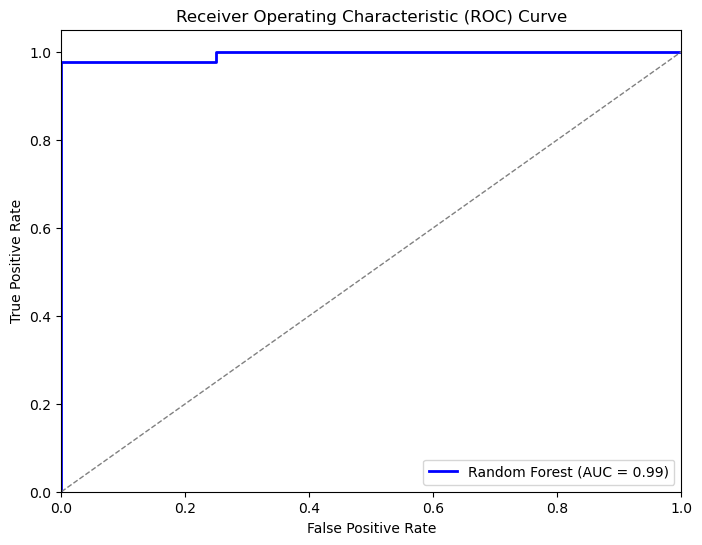

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convert target labels to binary numeric values
y_val_binary = y_val.replace({'YES': 1, 'NO': 0})

# Calculate probabilities for the positive class (class 1)
y_pred_proba_rf = random_forest_model.predict_proba(X_val)[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_val_binary, y_pred_proba_rf)
auc_rf = auc(fpr_rf, tpr_rf)
print("Random Forest AUC:", auc_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


AUC for Precision-Recall Curve: 0.9994396983599642


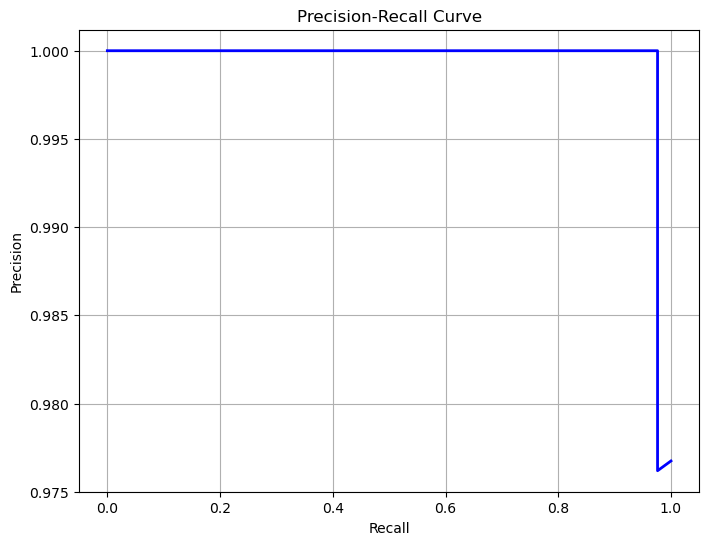

In [30]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Convert target labels to binary numeric values
y_val_binary = y_val.replace({'YES': 1, 'NO': 0})

# Calculate probabilities for the positive class (class 1)
y_pred_proba_rf = random_forest_model.predict_proba(X_val)[:, 1]

# Compute Precision-Recall curve and AUC
precision_rf, recall_rf, _ = precision_recall_curve(y_val_binary, y_pred_proba_rf)
auc_pr_rf = auc(recall_rf, precision_rf)
print("AUC for Precision-Recall Curve:", auc_pr_rf)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


Deep learning method

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense

# Load the CSV dataset
df = pd.read_csv("survey_lung_cancer.csv")

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['GENDER'])

# Separate features (X) and target (y)
X = df_encoded.drop('LUNG_CANCER', axis=1)
y = df_encoded['LUNG_CANCER']

# Convert target variable to numeric
y = y.replace({'NO': 0, 'YES': 1})

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train-validation-test sets (70-15-15)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize a Sequential model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(64, activation='relu'))

# Add second hidden layer
model.add(Dense(32, activation='relu'))

# Add output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)

# Evaluate the model on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9120 - loss: 0.1143 
Test Loss: 0.1080, Test Accuracy: 0.9149
